# Your Uni : am6490, cj2831, hk3354
# Your Full name : Arsh Misra, Conor Jones, Flora Kwon
# Link to your Public Github repository with Final report:
https://github.com/hyerhinkwon/QMSS5074-Adv-ML.git


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Loading Datasets

In [ ]:
# Load the the World Happiness 2023 dataset
whr_df = pd.read_csv('https://raw.githubusercontent.com/hyerhinkwon/QMSS5074-Adv-ML/refs/heads/main/Project%201/WHR_2023.csv')

# Loading country data
countrydata=pd.read_csv('https://raw.githubusercontent.com/hyerhinkwon/QMSS5074-Adv-ML/refs/heads/main/Project%201/newcountryvars.csv')

Processing the World Happiness 2023 dataset.

In [ ]:
# Convert the regression target ('happiness_score') into classification labels
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

Splitting training and test data.

In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
y_test_labels = y_test.astype('category').cat.codes

# Reset indices
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Merging the two data sets.

In [ ]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.

# Check common countries.
X_train_common = set(X_train['country']).intersection(set(countrydata['country_name']))
print(X_train_common)
X_test_common = set(X_test['country']).intersection(set(countrydata['country_name']))
print(X_test_common)

# Merge
X_train = pd.merge(X_train, countrydata, left_on='country', right_on='country_name', how='left')
X_test = pd.merge(X_test, countrydata, left_on='country', right_on='country_name', how='left')

{'Burkina Faso', 'Namibia', 'Serbia', 'Niger', 'Iraq', 'Mauritania', 'Peru', 'Ghana', 'Dominican Republic', 'Slovakia', 'Bolivia', 'Uzbekistan', 'Ivory Coast', 'Guinea', 'Mongolia', 'Poland', 'Mauritius', 'Denmark', 'Estonia', 'Bosnia and Herzegovina', 'Sweden', 'Egypt', 'Kosovo', 'Lithuania', 'South Korea', 'Ethiopia', 'India', 'Saudi Arabia', 'Tajikistan', 'Australia', 'Netherlands', 'Sri Lanka', 'Malta', 'Italy', 'Pakistan', 'Venezuela', 'Luxembourg', 'Mali', 'Bahrain', 'Israel', 'Jordan', 'Comoros', 'Albania', 'Morocco', 'Jamaica', 'Hungary', 'Nepal', 'El Salvador', 'Nigeria', 'Brazil', 'Montenegro', 'Norway', 'Sierra Leone', 'Mexico', 'Togo', 'Kenya', 'Zimbabwe', 'Portugal', 'Indonesia', 'Spain', 'Thailand', 'Iceland', 'China', 'Honduras', 'Tanzania', 'Liberia', 'Chile', 'Uganda', 'Madagascar', 'Ukraine', 'Austria', 'Senegal', 'Cyprus', 'Latvia', 'Zambia', 'Romania', 'Malawi', 'Afghanistan', 'Greece', 'United Kingdom', 'Belgium', 'Singapore', 'Finland', 'Iran', 'Slovenia', 'New Ze

## 1.  EDA

Plotting the frequency distribution / histogram of some of the numerical features that we think are important.

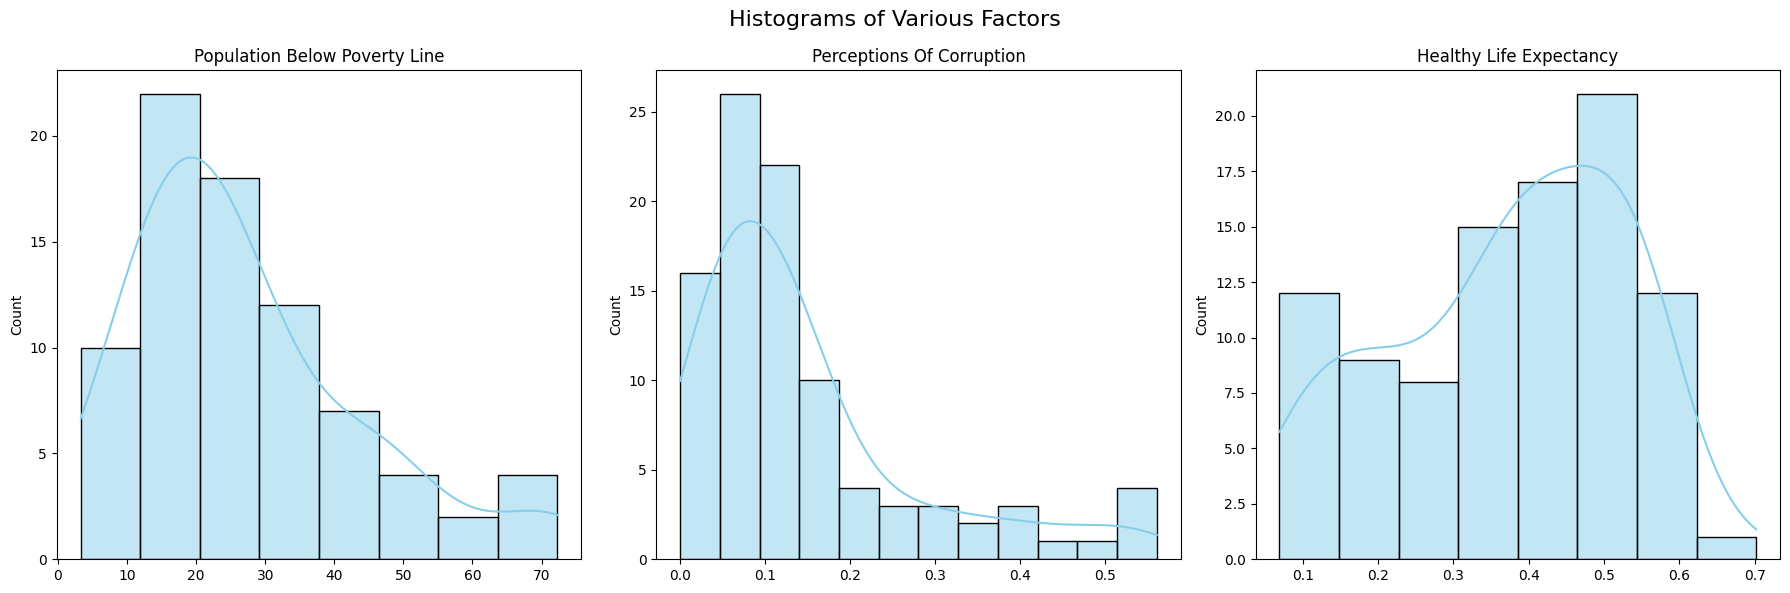

In [ ]:
# Create the histogram
variables = ['population_below_poverty_line', 'perceptions_of_corruption', 'healthy_life_expectancy']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Histograms of Various Factors', fontsize=16)
for i, var in enumerate(variables):
    sns.histplot(data=X_train, x=var, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(var.replace("_", " ").title())
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution.

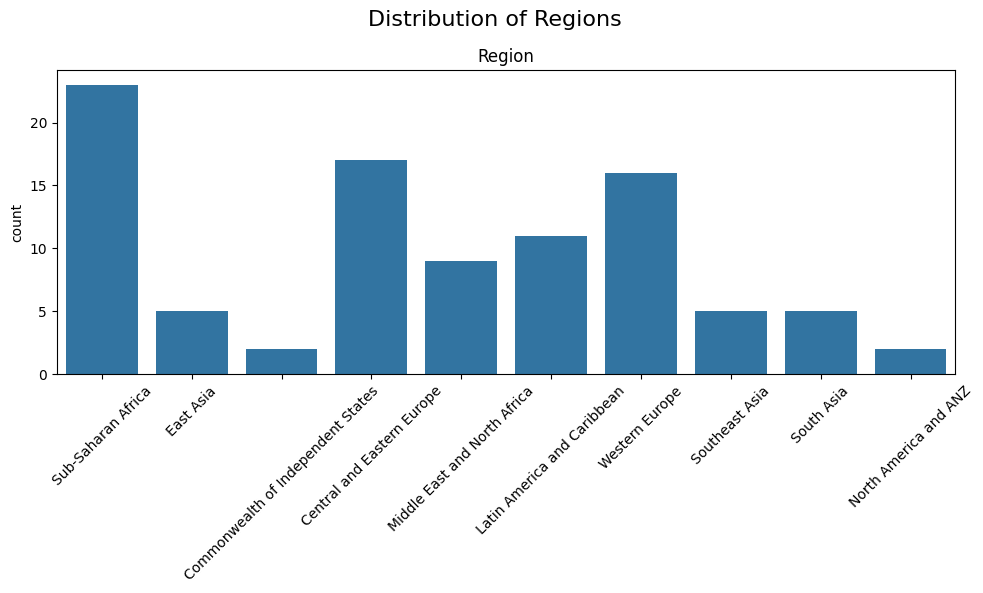

In [ ]:
# Your plotting code here:
cat_variables = ['region']
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle('Distribution of Regions', fontsize=16)
for i, var in enumerate(cat_variables):
    sns.countplot(data=X_train, x=var, ax=axes)
    axes.set_title(var.replace("_", " ").title())
    axes.set_xlabel('')
    axes.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Perform feature correlation analysis to identify relationships between variables, using Use Pearson correlation coefficients to analyze feature dependencies.

In [ ]:
numerical_X_train = X_train.select_dtypes(include='float64')
numerical_X_train.corr(method='pearson')

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
gdp_per_capita,1.000000,0.769394,0.860164,0.483145,-0.115580,0.432076,-0.045583,-0.620790,0.902386,0.830886,0.820940,0.815423,0.834177
social_support,0.769394,1.000000,0.771294,0.571646,0.084327,0.301807,-0.109651,-0.605304,0.855297,0.774096,0.809587,0.845490,0.667188
healthy_life_expectancy,0.860164,0.771294,1.000000,0.441636,-0.114189,0.414878,-0.043507,-0.716390,0.929456,0.959434,0.845512,0.834757,0.769030
freedom_to_make_life_choices,0.483145,0.571646,0.441636,1.000000,0.192401,0.372781,0.119970,-0.476459,0.519108,0.514694,0.453316,0.468835,0.483939
generosity,-0.115580,0.084327,-0.114189,0.192401,1.000000,0.105359,0.025726,-0.058728,-0.065485,-0.105490,-0.028513,-0.005128,0.015789
perceptions_of_corruption,0.432076,0.301807,0.414878,0.372781,0.105359,1.000000,-0.056750,-0.181277,0.421911,0.414737,0.398154,0.399698,0.666834
population,-0.045583,-0.109651,-0.043507,0.119970,0.025726,-0.056750,1.000000,-0.140834,-0.065315,-0.041229,-0.086023,-0.118630,-0.113701
population_below_poverty_line,-0.620790,-0.605304,-0.716390,-0.476459,-0.058728,-0.181277,-0.140834,1.000000,-0.683361,-0.719110,-0.582770,-0.579371,-0.537597
hdi,0.902386,0.855297,0.929456,0.519108,-0.065485,0.421911,-0.065315,-0.683361,1.000000,0.932439,0.939177,0.934324,0.831201
life_expectancy,0.830886,0.774096,0.959434,0.514694,-0.105490,0.414737,-0.041229,-0.719110,0.932439,1.000000,0.852332,0.811818,0.764468


Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

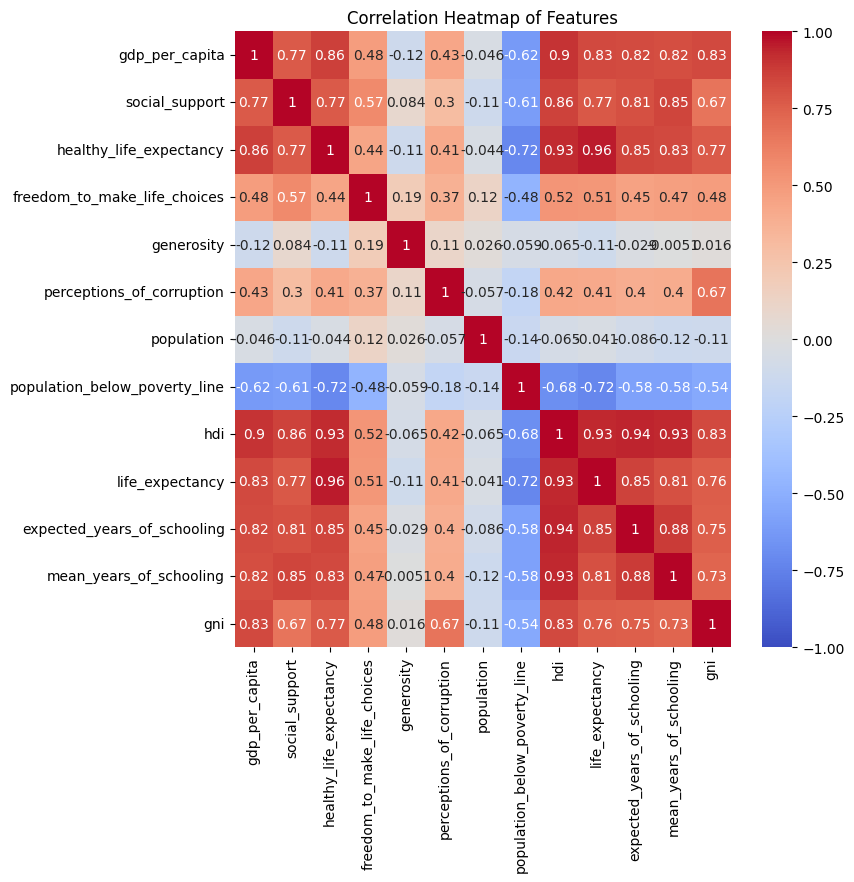

In [ ]:
correlation_matrix = numerical_X_train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

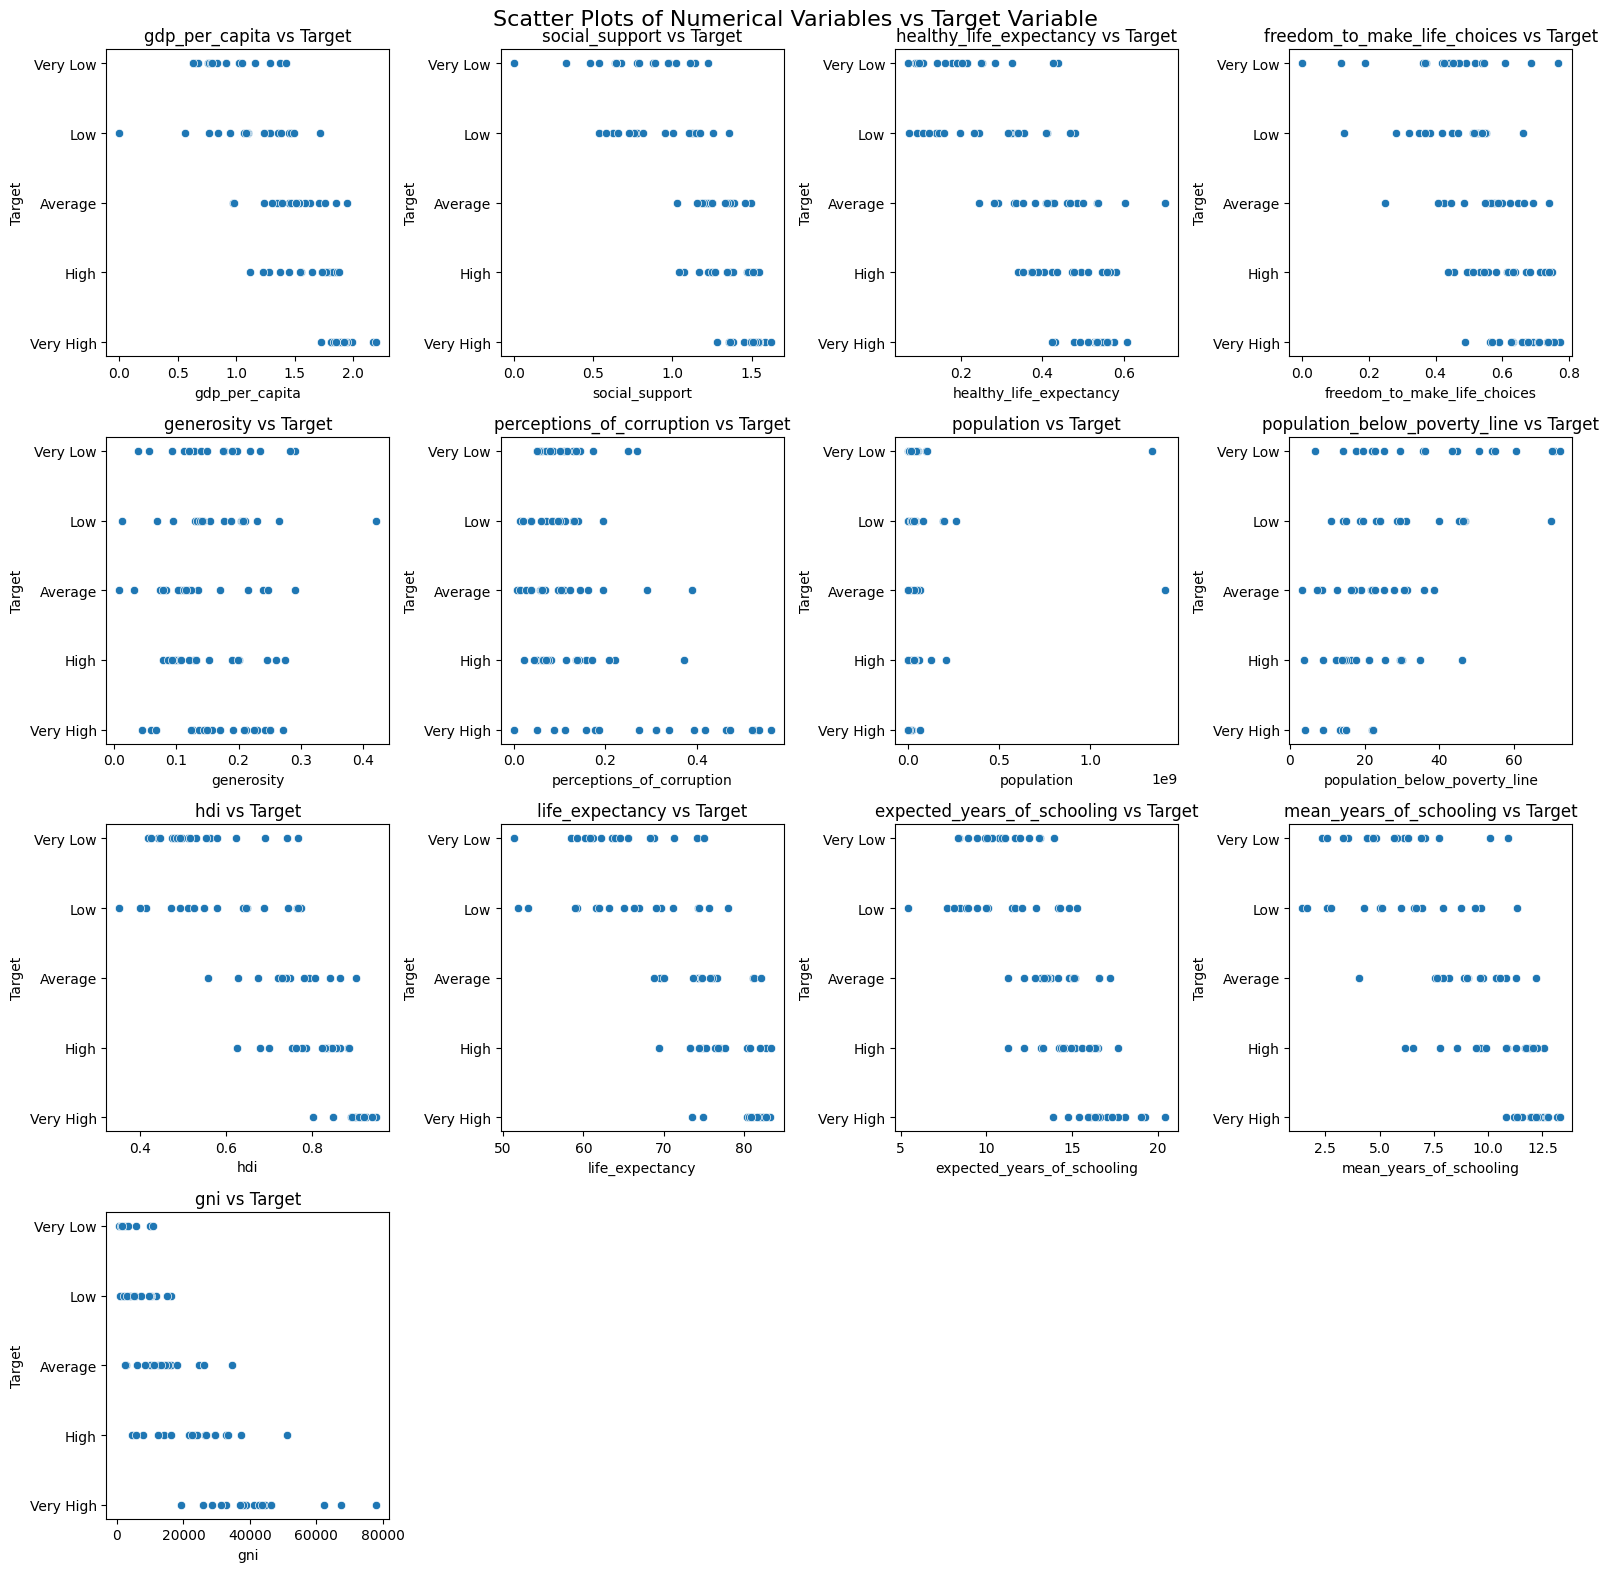

In [ ]:
# How it relates to target feature.
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
fig.suptitle('Scatter Plots of Numerical Variables vs Target Variable', fontsize=16)

axes = axes.flatten()

# Create scatter plots
num_plots = min(len(numerical_X_train.columns), len(axes))
for i, column in enumerate(numerical_X_train.columns[:num_plots]):
    sns.scatterplot(x=numerical_X_train[column], y=y_train, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Target')
    axes[i].set_title(f'{column} vs Target')

for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

In [ ]:
from scipy import stats

# Calculate Z-scores for each numerical X variable
z_scores = numerical_X_train.apply(stats.zscore)

# Identify potential outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print("Number of outliers per variable:")
print(outliers.sum())

Number of outliers per variable:
gdp_per_capita                   1
social_support                   1
healthy_life_expectancy          0
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
population                       0
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              0
dtype: int64


## 2. Feature Engineering

Applying log transformations to normalize skewed data and improve model stability.

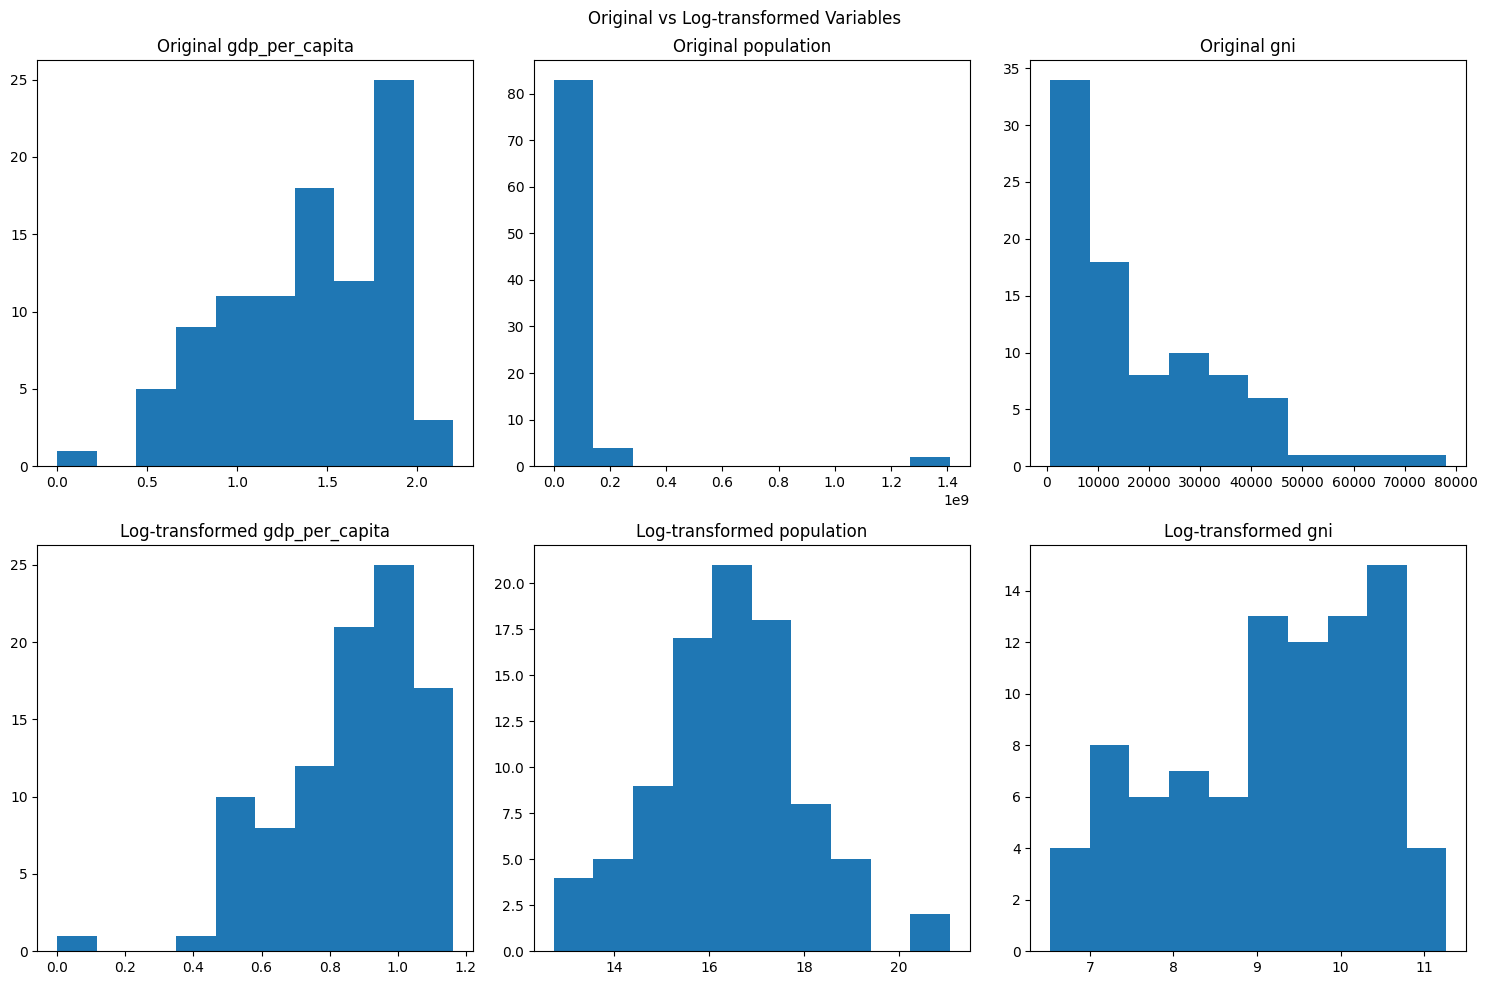

In [ ]:
# Your code here:

columns_to_log = ['gdp_per_capita', 'population', 'gni']
for col in columns_to_log:
    X_train[f'{col}_log'] = np.log1p(X_train[col])

# Visualize change
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Original vs Log-transformed Variables')

for i, col in enumerate(columns_to_log):
    axes[0, i].hist(X_train[col])
    axes[0, i].set_title(f'Original {col}')
    axes[1, i].hist(X_train[f'{col}_log'])
    axes[1, i].set_title(f'Log-transformed {col}')

plt.tight_layout()
plt.show()

Creating one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
X_train['freedom_healthy'] = X_train['freedom_to_make_life_choices'] * X_train['healthy_life_expectancy']

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.
numeric_features = X_train.select_dtypes(include=['float64'])
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'country', 'country_name']

# Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

# Fit your preprocessor object
preprocess = preprocessor.fit(X_train)

# Transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

## 4. Fit model on preprocessed data and save preprocessor function and model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)

# Fit model
model.fit(preprocessor(X_train), y_train)

# Apply same log transformations and interaction variable to X_test
columns_to_log = ['gdp_per_capita', 'population', 'gni']
for col in columns_to_log:
    X_test[f'{col}_log'] = np.log1p(X_test[col])

X_test['freedom_healthy'] = X_test['freedom_to_make_life_choices'] * X_test['healthy_life_expectancy']


model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42)

model.fit(preprocessor(X_train), y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

##5. Generate predictions from X_test data and compare it with true labels in Y_test

In [ ]:
# Score the model on testing data
test_score = model.score(preprocessor(X_test), y_test)
print(f"Testing Accuracy: {test_score:.4f}")

#-- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Show model performance by comparing prediction_labels with true labels
accuracy = accuracy_score(y_test, prediction_labels)
print(f"Prediction Accuracy: {accuracy:.4f}")

Testing Accuracy: 0.6190
Prediction Accuracy: 0.6190


##7. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Dropout, BatchNormalization

# Count features in input data
feature_count = preprocessor(X_train).shape[1]

num_classes = len(y_train.unique())

# Convert y_train to one-hot encoding
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)

# Use LeakyReLU activation
from keras.layers import LeakyReLU

leaky_relu = Sequential([
        Dense(128, input_dim=feature_count),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(32),
        LeakyReLU(alpha=0.1),
        Dense(num_classes, activation='softmax')
    ])

# Compile the model
leaky_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the model to the Training set
history = leaky_relu.fit(preprocessor(X_train), y_train_encoded,
               batch_size = 20,
               epochs = 300, validation_split=0.25)


# Save history for plotting
history_dict = history.history

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.2585 - loss: 1.6016 - val_accuracy: 0.2083 - val_loss: 1.6229
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.1995 - loss: 1.5999 - val_accuracy: 0.2083 - val_loss: 1.6189
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.2168 - loss: 1.5920 - val_accuracy: 0.2083 - val_loss: 1.6149
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2747 - loss: 1.5794 - val_accuracy: 0.2917 - val_loss: 1.6105
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2960 - loss: 1.5668 - val_accuracy: 0.3333 - val_loss: 1.6062
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3069 - loss: 1.5562 - val_accuracy: 0.3333 - val_loss: 1.6015
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2965 - loss: 1.5580 - val_accuracy: 0.3333 - val_loss: 1.5970
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3831 - loss: 1.5303 - val_accuracy: 0.3333 - val_loss

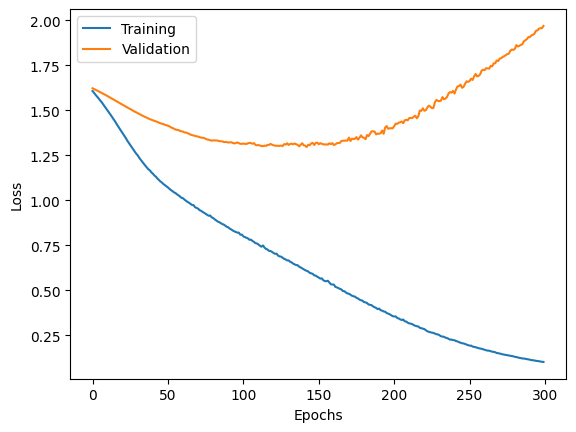

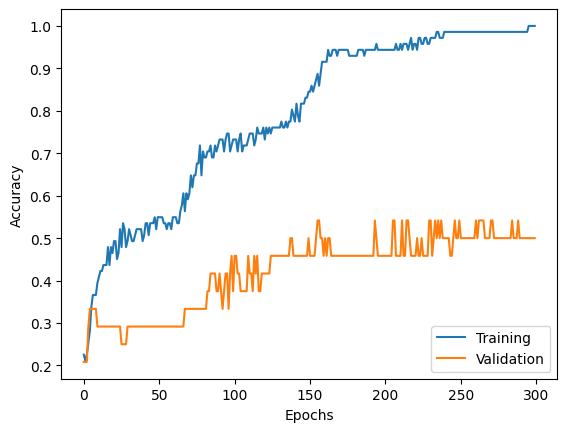

In [ ]:
# Plot loss and accuracy at each epoch
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

##8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use SHAP (SHapley Additive exPlanations) to analyze feature importance.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  0%|          | 0/42 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
7333/7333 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━

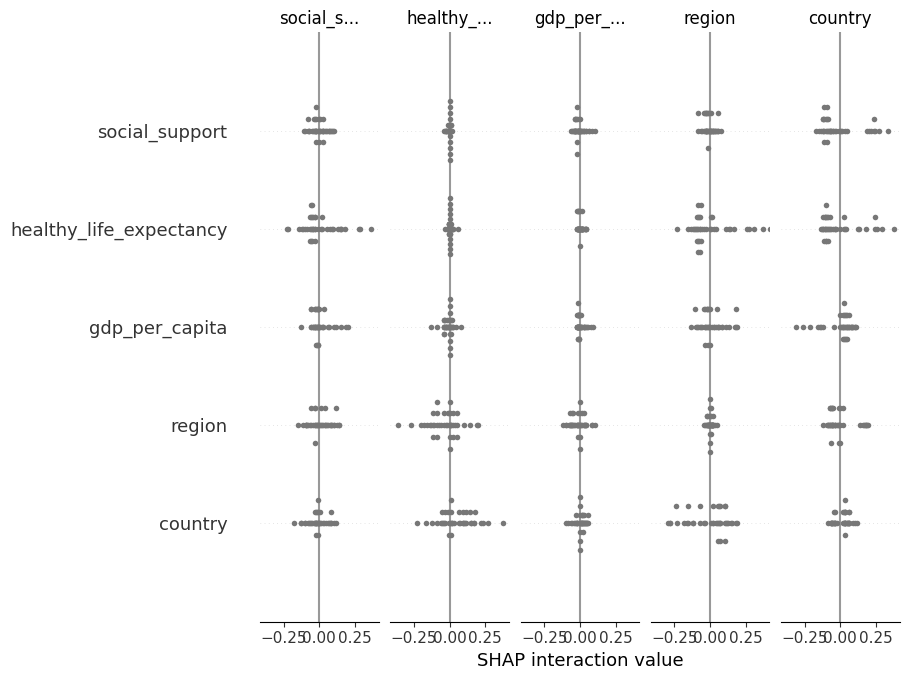

In [ ]:
# Import libraries
import shap
from sklearn.impute import SimpleImputer

# SHAP Analysis:
# Create a wrapper function to handle NaN values during prediction:
def predict_wrapper(X):
    predictions = leaky_relu.predict(X)
    # Handle potential NaN values in predictions (replace with a default value, e.g., 0)
    predictions = np.nan_to_num(predictions)
    return predictions

# Initialize SHAP explainer using the wrapper function
explainer = shap.KernelExplainer(predict_wrapper, preprocessor(X_train))

# Compute SHAP values for X_test
shap_values = explainer.shap_values(preprocess.transform(X_test))

# Generate SHAP summary plot
shap.summary_plot(shap_values, preprocess.transform(X_test), feature_names=X_train.columns)

<h3> Experimentation

In [ ]:
# Define a Neural Network Model with 5 layers 128->64->64->32->5
keras_model = Sequential([
    Dense(128, input_dim=feature_count, activation='relu'), # Use the correct feature count
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Convert y_train to one-hot encoding
lb = LabelBinarizer()
y_train_encoded = lb.fit_transform(y_train)

# Fitting the model to the Training set
history = keras_model.fit(preprocessor(X_train), y_train_encoded,
               batch_size = 20,
               epochs = 300, validation_split=0.25)

# Save history for plotting later
history_dict = history.history

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.1762 - loss: 1.6111 - val_accuracy: 0.1667 - val_loss: 1.6084
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2381 - loss: 1.6040 - val_accuracy: 0.1667 - val_loss: 1.6049
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3037 - loss: 1.5860 - val_accuracy: 0.1667 - val_loss: 1.6021
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3196 - loss: 1.5888 - val_accuracy: 0.1667 - val_loss: 1.5993
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3342 - loss: 1.5781 - val_accuracy: 0.2917 - val_loss: 1.5966
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4173 - loss: 1.5683 - val_accuracy: 0.2917 - val_loss: 1.5937
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4040 - loss: 1.5550 - val_accuracy: 0.2917 - val_loss: 1.5909
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4463 - loss: 1.5387 - val_accuracy: 0.2917 - val_loss: 1.5881
Epo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
2/2 ━━

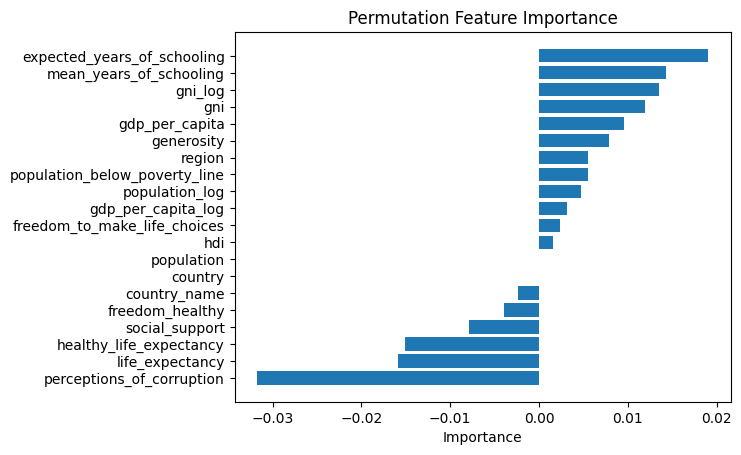

                          Feature  Importance
0       perceptions_of_corruption   -0.031746
1                 life_expectancy   -0.015873
2         healthy_life_expectancy   -0.015079
3                  social_support   -0.007937
4                 freedom_healthy   -0.003968
5                    country_name   -0.002381
6                         country    0.000000
7                      population    0.000000
8                             hdi    0.001587
9    freedom_to_make_life_choices    0.002381
10             gdp_per_capita_log    0.003175
11                 population_log    0.004762
12  population_below_poverty_line    0.005556
13                         region    0.005556
14                     generosity    0.007937
15                 gdp_per_capita    0.009524
16                            gni    0.011905
17                        gni_log    0.013492
18        mean_years_of_schooling    0.014286
19    expected_years_of_schooling    0.019048


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance

# Permutation Feature Importance Analysis with NaN Handling:

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model, preprocessor):
        self.keras_model = keras_model
        self.preprocessor = preprocessor

    def fit(self, X, y):
        return self

# Get predicted class labels
    def predict(self, X):
        preprocessed_X = self.preprocessor(X)  # Call the function directly
        predictions = self.keras_model.predict(preprocessed_X)
        predictions = np.nan_to_num(predictions, nan=0.0)
        return predictions.argmax(axis=1)  # Return class labels

# Create an instance of the wrapper class
wrapper = KerasClassifierWrapper(keras_model, preprocessor)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test_labels, wrapper.predict(X_test))  # Use predict_wrapper

# Perform permutation importance using the wrapper instance
result = permutation_importance(
    estimator=wrapper,  # Use the wrapper instance
    X=X_test,  # Pass the original X_test
    y=y_test_labels,
    n_repeats=30,
    random_state=42,
    scoring='accuracy'
)

# Process and Visualize Results:

# 1. Get Feature Importances and Sort
importances = result.importances_mean
sorted_idx = importances.argsort()

# 2. Create a DataFrame for easier handling
df_importances = pd.DataFrame({
    "Feature": X_train.columns[sorted_idx],
    "Importance": importances[sorted_idx]
})

# 3. Plotting
fig, ax = plt.subplots()
ax.barh(df_importances["Feature"], df_importances["Importance"])
ax.set_title("Permutation Feature Importance")
ax.set_xlabel("Importance")
plt.show()

# 4. Display the DataFrame
print(df_importances)

SHAP interaction provides shows how each variable contributes to predictions for individual instances. However, running the model took a long time, showing that it is extremely resource-intensive. We can visualize variable attributions but the the conceptual reasoning the model uses remains vague. In combination with permutation importance, we were able to identify relevant features globally to compare with the detailed per-prediction explanation from SHAP.